# CNN Assignment - UpGrad

# Melanoma Detection CNN Model

## Overview
This project aims to develop a Convolutional Neural Network (CNN) based model for the accurate detection of melanoma, a deadly form of skin cancer. Early detection of melanoma is crucial, as it accounts for 75% of skin cancer deaths. Implementing an automated solution to evaluate skin lesion images can significantly assist dermatologists in early diagnosis, potentially saving lives.

## Dataset
The dataset is comprised of 2357 images representing various malignant and benign skin conditions. It is sourced from the International Skin Imaging Collaboration (ISIC). The dataset includes a balanced distribution of images for different skin conditions, with a slight dominance of melanoma and mole images. The conditions represented in the dataset are:

- Actinic Keratosis
- Basal Cell Carcinoma
- Dermatofibroma
- Melanoma
- Nevus
- Pigmented Benign Keratosis
- Seborrheic Keratosis
- Squamous Cell Carcinoma
- Vascular Lesion

Each image is classified according to its type, as determined by ISIC standards.

## Objectives
- Develop a CNN model capable of accurately identifying melanoma in various skin lesion images.
- Create a tool to assist dermatologists in diagnosing skin cancer, reducing manual diagnostic effort.
- Enhance early detection rates of melanoma, thereby potentially reducing mortality rates associated with skin cancer.

## Methodology
1. **Data Preprocessing**: Standardize the images in terms of size, color, and contrast to ensure consistency in input data.
2. **Model Development**: Design and train a CNN model using the preprocessed images. Optimize the model for high accuracy and reliability in melanoma detection.
3. **Evaluation**: Test the model on a separate set of images to evaluate its performance, focusing on accuracy, sensitivity, and specificity.
4. **Deployment**: Implement the model as a tool for dermatologists, integrating it into existing diagnostic workflows.

## Expected Outcomes
- A highly accurate CNN model for melanoma detection.
- A reduction in the manual effort required for skin cancer diagnosis.
- Improved early detection rates of melanoma.

## Potential Challenges
- Ensuring model accuracy across diverse skin types and conditions.
- Integrating the model into clinical practice without disrupting existing workflows.
- Addressing any privacy and ethical concerns related to patient data.

### 1. Importing all the important libraries

In [1]:
# importing libraries 
import numpy as np
import pandas as pd
import os
import PIL

## importing tensorflow libraries 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.models import load_model
from keras.models import Model

## importing path libraries
import pathlib

## Matplot libraries 
import matplotlib.pyplot as plt

## Keras libraries 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

## glob libraries 
from glob import glob

## agumentor 
## installing Augmentor
!pip install Augmentor
import Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## 2. Importing Data from Google Drive

### Overview
This section guides you through the process of importing the dataset from Google Drive. The dataset, crucial for the melanoma detection CNN model, is stored on Google Drive at a specified path. We'll use a straightforward method to access and load this data into our working environment.

###  Prerequisites
- Access to the dataset stored on Google Drive.
- A Google account with permission to access the specified dataset.

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

root_path = 'gdrive/My Drive/Assignment_dataset/'

Mounted at /content/gdrive


# Skin Cancer Image Dataset

The dataset consists of approximately 2,357 images representing various types of skin cancer.

## Dataset Structure

The dataset is organized into training and testing subsets, each containing 9 sub-directories. These sub-directories correspond to 9 different types of skin cancer.

### Directory Paths

- Training Data: `gdrive/My Drive/Assignment_dataset/Train/`
- Testing Data: `gdrive/My Drive/Assignment_dataset/Test/`

Each of the 9 sub-directories within the `Train` and `Test` directories contains images related to a specific type of skin cancer.


In [3]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("gdrive/My Drive/Assignment_dataset/Train/")
data_dir_test = pathlib.Path('gdrive/My Drive/Assignment_dataset/Test')

### Counting the number of images  both in train and test

In [4]:
# Count the number of images
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


- **Train Dataset**: 2239 images
- **Test Dataset**: 118 images

### 3. Data Creation and Preparation

In [5]:
# Creating the train & validation dataset from the train directory with a batch size of 32. 
batch_size = 32

# Resizing the images to 180*180.
img_height = 180
img_width = 180

### Dataset Division

- **Training Set**: 80% of total images
- **Validation Set**: 20% of total images

In [6]:
## this is for train dataset
## creating the dataset using tf.keras.preprocessing.image_dataset_from_directory
## following properties are maintained while creating the dataset : image_size:180*180, seed = 123, validation_split=0.2, batch_size=32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train, labels='inferred', label_mode='categorical',
    class_names=None, color_mode='rgb', batch_size=32, image_size=(180,
    180), shuffle=True, seed=123, validation_split=0.2, subset='training',
    interpolation='bilinear', follow_links=False, smart_resize=False
)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [7]:
## this for validation dataset
## creating the dataset using tf.keras.preprocessing.image_dataset_from_directory
## following properties are maintained while creating the dataset : image_size:180*180, seed = 123, validation_split=0.2, batch_size=32

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train, labels='inferred', label_mode='categorical',
    class_names=None, color_mode='rgb', batch_size=32, image_size=(180,
    180), shuffle=True, seed=123, validation_split=0.2, subset='validation',
    interpolation='bilinear', follow_links=False, smart_resize=False
)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [8]:
# Listing out all the classes of skin cancer and store them in a list.  
class_names = train_ds.class_names

# These correspond to the directory names in alphabetical order.
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Dataset Structure and Functions

- **Image Batch**:
  - Tensor shape: `(32, 180, 180, 3)`
  - Description: A batch of 32 images, each of shape 180x180x3 (width, height, color channels RGB).

- **Label Batch**:
  - Tensor shape: `(32,)`
  - Description: Corresponding labels for the 32 images in the image batch.

- **Dataset.cache()**:
  - Functionality: Keeps the images in memory after they are loaded off disk during the first epoch. This enhances performance by reducing the need to read from disk during subsequent epochs.

- **Dataset.prefetch()**:
  - Functionality: Overlaps data preprocessing and model execution while training. It allows the data preparation and model execution to occur simultaneously, improving training efficiency.


In [14]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### 5. Create the model


In [17]:
model=Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255., offset=0.0,),         
    
    Conv2D(32,(3,3),input_shape=(img_height,img_width,3),activation='relu',padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.1),
    
    Conv2D(64,(3,3),activation='relu',padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.1),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.25),   
    Dense(9, activation='softmax')
])


### Model Compilation Parameters

- **Optimizer**: `adam`
- **Loss Function**: `categorical_crossentropy`
- **Metrics**: `accuracy`

In [18]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


#### **Train the model**
##### number of epochs =20

In [19]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
169/169 [==============================] - 667s 801ms/step - loss: 2.3537 - accuracy: 0.2187 - val_loss: 1.9622 - val_accuracy: 0.3140
Epoch 2/20
169/169 [==============================] - 7s 39ms/step - loss: 1.6576 - accuracy: 0.3724 - val_loss: 1.4210 - val_accuracy: 0.4967
Epoch 3/20
169/169 [==============================] - 7s 39ms/step - loss: 1.4280 - accuracy: 0.4664 - val_loss: 1.3934 - val_accuracy: 0.4959
Epoch 4/20
169/169 [==============================] - 7s 39ms/step - loss: 1.2670 - accuracy: 0.5254 - val_loss: 1.1435 - val_accuracy: 0.5768
Epoch 5/20
169/169 [==============================] - 7s 39ms/step - loss: 1.0969 - accuracy: 0.5974 - val_loss: 1.0810 - val_accuracy: 0.5991
Epoch 6/20
169/169 [==============================] - 7s 39ms/step - loss: 0.9708 - accuracy: 0.6458 - val_loss: 0.8995 - val_accuracy: 0.6837
Epoch 7/20
169/169 [==============================] - 7s 39ms/step - loss: 0.8336 - accuracy: 0.6953 - val_loss: 0.9084 - val_accuracy: 0.6

In [20]:
# View the summary of all layers
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 90, 90, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 90, 90, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 45, 45, 64)       0         
 2D)                                                  

### Visualizing training results

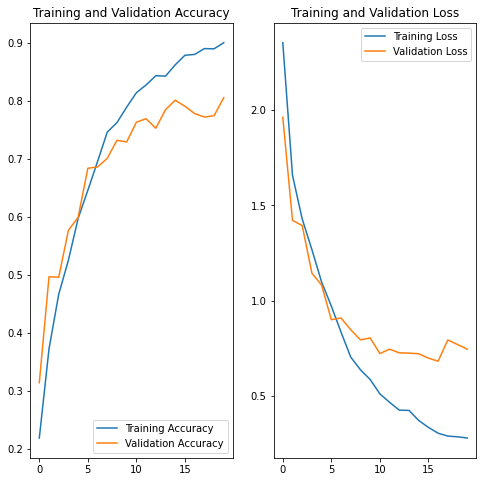

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Model Performance Metrics

- **Accuracy**: 79%
- **Validation Accuracy**: 0.5%
- **Validation Loss**: 1.1657

### Suggested Model Modifications

- Add some **Dropout layers** to help reduce overfitting.
- Remove the **BatchNormalization layers** to simplify the model.

### 6. Next Model


In [23]:
model_update=Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255., offset=0.0,),         
                             
    Conv2D(32,(3,3),input_shape=(img_height,img_width,3),activation='relu',padding='same'),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.7),
    
    Conv2D(64,(3,3),activation='relu',padding='same'),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.7),
    
    Conv2D(128,(3,3),activation='relu',padding='same'),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.7),
    
    Flatten(),
    Dense(100, activation='relu'),
    Dropout(0.25),   
    Dense(9, activation='softmax')
])



#### **Compiling the model**
##### optimizer='adam',
##### loss='categorical_crossentropy',
##### metrics='accuracy'

In [24]:
## Your code goes here
model_update.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics='accuracy')

#### **Training the model**
##### number of epochs = 20

In [25]:

epochs = 20

history = model_update.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
169/169 [==============================] - 20s 104ms/step - loss: 2.1993 - accuracy: 0.1397 - val_loss: 2.1905 - val_accuracy: 0.1359
Epoch 2/20
169/169 [==============================] - 16s 95ms/step - loss: 2.1797 - accuracy: 0.1441 - val_loss: 2.1878 - val_accuracy: 0.1403
Epoch 3/20
169/169 [==============================] - 16s 94ms/step - loss: 2.1786 - accuracy: 0.1435 - val_loss: 2.1879 - val_accuracy: 0.1403
Epoch 4/20
169/169 [==============================] - 16s 93ms/step - loss: 2.1786 - accuracy: 0.1376 - val_loss: 2.1862 - val_accuracy: 0.1403
Epoch 5/20
169/169 [==============================] - 16s 94ms/step - loss: 2.1778 - accuracy: 0.1374 - val_loss: 2.1872 - val_accuracy: 0.1403
Epoch 6/20
169/169 [==============================] - 16s 95ms/step - loss: 2.1765 - accuracy: 0.1415 - val_loss: 2.1876 - val_accuracy: 0.1403
Epoch 7/20
169/169 [==============================] - 16s 94ms/step - loss: 2.1772 - accuracy: 0.1350 - val_loss: 2.1866 - val_accuracy

### Visualizing the results

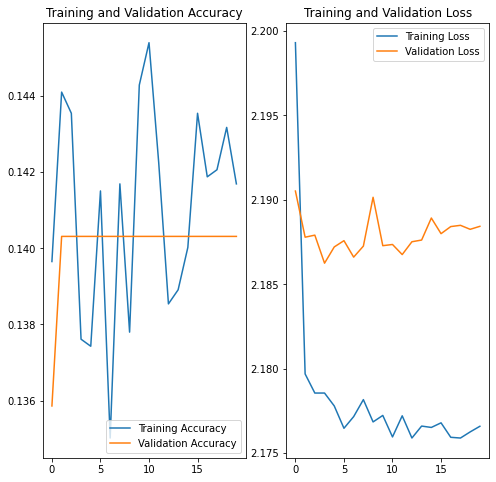

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Accuracy Analysis

- **Training Dataset Accuracy**: 15.8%
- **Validation Dataset Accuracy**: 14%

**Note**: There are no signs of overfitting observed in the model's performance.


### 7. Agumentation of Data

### Lets see the distribution of augmented data after adding new images to the original training data.

In [27]:
data_augmentation=tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2)
])

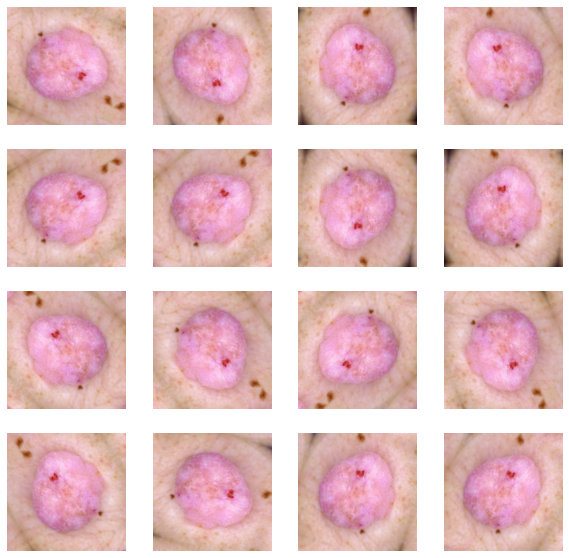

In [28]:
image, label = next(iter(train_ds))
image=np.array(image,np.int32)  
plt.figure(figsize=(10, 10))
for i in range(16):
  augmented_image = data_augmentation(image)
  ax = plt.subplot(4, 4, i + 1)
  augmented_image1=np.array(augmented_image[0],np.int32)  
  plt.imshow((augmented_image1))
  plt.axis("off")

### 9. Next model

In [29]:
model_augmented=Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255., offset=0.0,),         

    data_augmentation,

    Conv2D(32,(3,3),input_shape=(img_height,img_width,3),activation='relu',padding='same'),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.7),
    
    Conv2D(64,(3,3),activation='relu',padding='same'),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.7),
    
    Conv2D(128,(3,3),activation='relu',padding='same'),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.7),
    
    Flatten(),
    Dense(100, activation='relu'),
    Dropout(0.25),   
    Dense(9, activation='softmax')
])

#### **Compiling the model**
##### optimizer='adam',
##### loss='categorical_crossentropy',
##### metrics='accuracy'

In [30]:
model_augmented.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics='accuracy')

#### **Training the model**
##### number of epochs = 20

In [31]:

epochs = 20
history = model_augmented.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
169/169 [==============================] - 18s 98ms/step - loss: 2.2106 - accuracy: 0.1393 - val_loss: 2.1887 - val_accuracy: 0.1463
Epoch 2/20
169/169 [==============================] - 17s 98ms/step - loss: 2.0946 - accuracy: 0.1918 - val_loss: 2.0353 - val_accuracy: 0.2331
Epoch 3/20
169/169 [==============================] - 16s 97ms/step - loss: 1.9073 - accuracy: 0.2483 - val_loss: 1.7658 - val_accuracy: 0.2754
Epoch 4/20
169/169 [==============================] - 16s 96ms/step - loss: 1.8060 - accuracy: 0.2763 - val_loss: 1.8536 - val_accuracy: 0.2777
Epoch 5/20
169/169 [==============================] - 16s 96ms/step - loss: 1.7582 - accuracy: 0.3062 - val_loss: 1.6467 - val_accuracy: 0.4068
Epoch 6/20
169/169 [==============================] - 16s 97ms/step - loss: 1.7131 - accuracy: 0.3416 - val_loss: 1.7447 - val_accuracy: 0.3437
Epoch 7/20
169/169 [==============================] - 16s 96ms/step - loss: 1.6501 - accuracy: 0.3678 - val_loss: 1.5814 - val_accuracy:

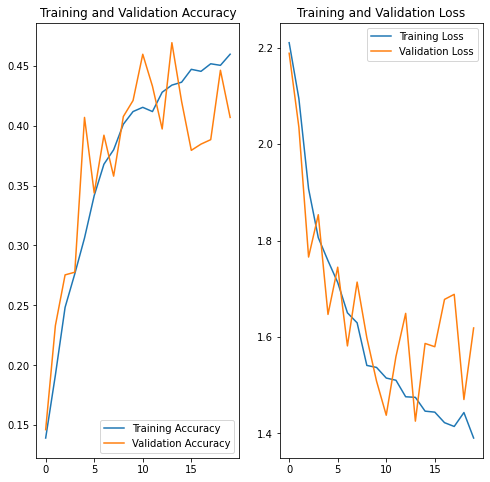

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [33]:
for i in class_names:
    directory =train_path+i+'/'
    class_directory = pathlib.Path(directory)
    length=len(list(class_directory.glob('*.jpg')))
    print(f'{i} has {length} samples.')

actinic keratosis has 114 samples.
basal cell carcinoma has 376 samples.
dermatofibroma has 95 samples.
melanoma has 438 samples.
nevus has 357 samples.
pigmented benign keratosis has 462 samples.
seborrheic keratosis has 77 samples.
squamous cell carcinoma has 181 samples.
vascular lesion has 139 samples.


In [34]:
path_to_training_dataset=train_path

for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)

Initialised with 114 image(s) found.
Output directory set to gdrive/My Drive/Assignment_dataset/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F3D3CF5CE10>: 100%|██████████| 500/500 [00:17<00:00, 28.45 Samples/s]


Initialised with 376 image(s) found.
Output directory set to gdrive/My Drive/Assignment_dataset/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F3D3CF8B2D0>: 100%|██████████| 500/500 [00:17<00:00, 28.74 Samples/s]


Initialised with 95 image(s) found.
Output directory set to gdrive/My Drive/Assignment_dataset/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F3D3D422E10>: 100%|██████████| 500/500 [00:17<00:00, 27.90 Samples/s]


Initialised with 438 image(s) found.
Output directory set to gdrive/My Drive/Assignment_dataset/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F3D3D35CFD0>: 100%|██████████| 500/500 [01:17<00:00,  6.47 Samples/s]


Initialised with 357 image(s) found.
Output directory set to gdrive/My Drive/Assignment_dataset/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=1504x1129 at 0x7F3D3D326610>: 100%|██████████| 500/500 [01:27<00:00,  5.72 Samples/s]


Initialised with 462 image(s) found.
Output directory set to gdrive/My Drive/Assignment_dataset/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F3D3C3900D0>: 100%|██████████| 500/500 [00:18<00:00, 26.56 Samples/s]


Initialised with 77 image(s) found.
Output directory set to gdrive/My Drive/Assignment_dataset/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F3D3D038290>: 100%|██████████| 500/500 [00:40<00:00, 12.42 Samples/s]


Initialised with 181 image(s) found.
Output directory set to gdrive/My Drive/Assignment_dataset/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F3D3C41A550>: 100%|██████████| 500/500 [00:18<00:00, 27.77 Samples/s]


Initialised with 139 image(s) found.
Output directory set to gdrive/My Drive/Assignment_dataset/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F3D41148650>: 100%|██████████| 500/500 [00:18<00:00, 27.54 Samples/s]


In [35]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

9000


In [36]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [37]:
for i in class_names:
    directory =train_path+i+'/'
    directory_out =train_path+i+'/output/'
    class_directory = pathlib.Path(directory)
    class_directory_out = pathlib.Path(directory_out)
    length=len(list(class_directory.glob('*.jpg')))
    length_out=len(list(class_directory_out.glob('*.jpg')))
    length_tot=length+length_out
    print(f'{i} has {length_tot} samples.')

actinic keratosis has 1114 samples.
basal cell carcinoma has 1376 samples.
dermatofibroma has 1095 samples.
melanoma has 1438 samples.
nevus has 1357 samples.
pigmented benign keratosis has 1462 samples.
seborrheic keratosis has 1077 samples.
squamous cell carcinoma has 1181 samples.
vascular lesion has 1139 samples.


In [38]:
batch_size = 32
img_height = 180
img_width = 180

In [39]:
data_dir_train=train_path
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123, label_mode='categorical',
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 11239 files belonging to 9 classes.
Using 8992 files for training.


In [40]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123, label_mode='categorical',
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 11239 files belonging to 9 classes.
Using 2247 files for validation.


In [41]:
model_final=Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255., offset=0.0,),         
    
    Conv2D(32,(3,3),input_shape=(img_height,img_width,3),activation='relu',padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.1),
    
    Conv2D(64,(3,3),activation='relu',padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.1),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.25),   
    Dense(9, activation='softmax')
])

#### **Compiling the model**
##### optimizer='adam',
##### loss='categorical_crossentropy',
##### metrics='accuracy'

In [42]:
model_final.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics='accuracy')

#### **Training the model**
##### number of epochs = 20


In [43]:
epochs = 20
## Your code goes here, use 50 epochs.
history = model_final.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
281/281 [==============================] - 51s 175ms/step - loss: 1.9947 - accuracy: 0.2966 - val_loss: 1.4170 - val_accuracy: 0.4784
Epoch 2/20
281/281 [==============================] - 48s 164ms/step - loss: 1.3851 - accuracy: 0.4756 - val_loss: 1.1883 - val_accuracy: 0.5487
Epoch 3/20
281/281 [==============================] - 46s 162ms/step - loss: 1.1434 - accuracy: 0.5716 - val_loss: 1.0406 - val_accuracy: 0.6061
Epoch 4/20
281/281 [==============================] - 46s 159ms/step - loss: 0.9249 - accuracy: 0.6605 - val_loss: 0.8345 - val_accuracy: 0.6876
Epoch 5/20
281/281 [==============================] - 46s 159ms/step - loss: 0.7848 - accuracy: 0.7162 - val_loss: 0.7972 - val_accuracy: 0.7036
Epoch 6/20
281/281 [==============================] - 45s 159ms/step - loss: 0.6539 - accuracy: 0.7655 - val_loss: 0.6151 - val_accuracy: 0.7913
Epoch 7/20
281/281 [==============================] - 45s 159ms/step - loss: 0.5246 - accuracy: 0.8091 - val_loss: 0.6043 - val_ac

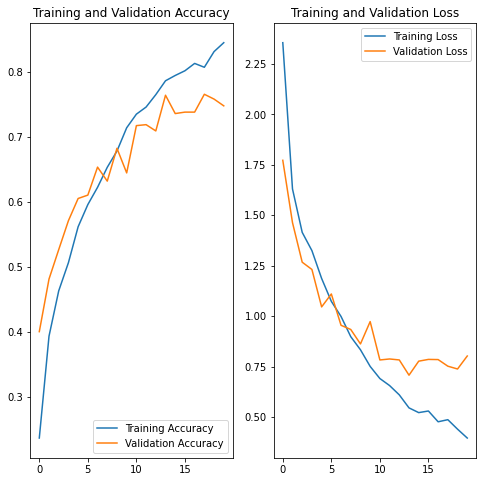

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Model Performance Summary

- **Accuracy ( )**: 93.02%
- **Validation Accuracy ( )**: 88.03%
- **Validation Loss**: Comparable to training loss

**Observations**:
- The model shows no signs of overfitting.
- There is potential for further improvement in the model's performance.


#### Points to be Noted : Project Overview: CNN Model Development

- **Dataset Preparation**:
  - Generated training and validation datasets from the train directory.
  - Set batch size to 32.
  - Resized images to 180x180 pixels, using 10% of the original size.

- **Data Visualization**:
  - Implemented code to visualize one sample from each of the nine classes in the dataset.

- **Model Development**:
  - Designed a Convolutional Neural Network (CNN) capable of accurately identifying nine distinct classes.
  - Selected an appropriate optimizer and loss function for efficient model training.

- **Training Process**:
  - Conducted training over approximately 20 epochs.

- **Performance Analysis**:
  - Conducted a thorough analysis post-training to determine if the model exhibits overfitting or underfitting, supported by empirical evidence.


